## new


In [1]:
import cv2
import os

# Load video file
cap = cv2.VideoCapture("C:\\Users\\DELL\\Downloads\\PHP Student23.mkv")

# Define video frame rate and number of frames per minute
fps = cap.get(cv2.CAP_PROP_FPS)
frames_per_minute = int(fps * 2.4)

# Initialize minute counter and frame counter
minute_count = 0
frame_count = 0

# Path to the output folder for the extracted frames
#frames_folder = "C:\\Users\\DELL\\Desktop\\extracted_frames\\"

# Create the output folders for faces and eyes
output_folder_faces = "C:\\Users\\DELL\\Desktop\\detected_faces\\"
output_folder_eyes = "C:\\Users\\DELL\\Desktop\\detected_eyes\\"
os.makedirs(output_folder_faces, exist_ok=True)
os.makedirs(output_folder_eyes, exist_ok=True)

# Load the face and eye detection classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Loop through video frames
while True:
    # Read next frame
    ret, frame = cap.read()
    if not ret:
        break

    # Increment frame counter
    frame_count += 1

    # Calculate current minute
    current_minute = int(frame_count / frames_per_minute)

    # If current minute is different from previous minute, process frame
    if current_minute != minute_count:
        # Extract current frame and save as image file
        cv2.imwrite(f'C:\\Users\\DELL\\Desktop\\extracted_frames\\frame_{current_minute}.jpg', frame)
        minute_count = current_minute

        # Load the image
        img = frame
        
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        # Loop through all the detected faces
        for (x,y,w,h) in faces:
            # Extract the face from the image
            face = img[y:y+h, x:x+w]
            face_resized = cv2.resize(face, (224, 224))
            
            # Save the extracted face to the output folder without bounding box
            cv2.imwrite(os.path.join(output_folder_faces, f"{frame_count}.jpg"), face_resized)
            
            # Detect eyes in the face region
            eyes = eye_cascade.detectMultiScale(face_resized)
            if len(eyes) >= 2:
                    x1, y1, w1, h1 = eyes[0]
                    x2, y2, w2, h2 = eyes[1]
                    eye_pair = face_resized[min(y1, y2):max(y1+h1, y2+h2), min(x1, x2):max(x1+w1, x2+w2)]
                    #cv2.imwrite(os.path.join(output_folder_eyes,f'{frame_count}.jpg', eye_pair))
                    cv2.imwrite(os.path.join(output_folder_eyes, f"{frame_count}.jpg"), eye_pair)
            # Loop through all the detected eyes
           
                
                # Save the extracted eye to the output folder with bounding box
              #  eye_with_box = cv2.rectangle(face_resized, (ex,ey), (ex+ew,ey+eh), (0, 255, 0), 2)
               # cv2.imwrite(os.path.join(output_folder_eyes, f"{frame_count}_{ex}_{ey}_with_box.jpg"),eye_with_box)


In [13]:
import cv2
import os
import matplotlib.pyplot as plt

# Load the face and eye cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

folder_path = "C:\\Users\\DELL\\Desktop\\extracted_frames\\"

# Initialize lists to store the coordinates of the bounding boxes
face_positions = []
eye_positions = []

# Loop through each frame in the folder
for i, filename in enumerate(sorted(os.listdir(folder_path))):
    if filename.endswith('.jpg'):
        # Read the image
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        # Draw bounding boxes around the faces and eyes
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            face_positions.append((i, x, y, w, h)) # Add face position to list
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
                eye_positions.append((i, x+ex, y+ey, ew, eh)) # Add eye position to list

        # Display the image
        cv2.imshow('Face and eyes detection', img)
        cv2.waitKey(1)

# Release the video capture object and close all windows
cv2.destroyAllWindows()

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the paths for the training and testing data
train_path = "D:\\dataset\\dataset\\train"
test_path = "D:\\dataset\\dataset\\test"
val_path="D:\\dataset\\dataset\\validate"
# Define the CNN architecture
input_layer = Input(shape=(64, 64, 3))
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
conv2 = Conv2D(64, (3, 3), activation='relu')(conv1)
pooling = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pooling)
fc = Dense(2, activation='softmax')(flatten)

model = Model(inputs=input_layer, outputs=fc)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 2)                 115202    
                                                             

In [2]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)


In [3]:
# Set the parameters for the data generator
datagen = ImageDataGenerator(rescale=1./255)

# Generate the training data from the training folder
train_generator = datagen.flow_from_directory(
        train_path,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# Generate the testing data from the testing folder
test_generator = datagen.flow_from_directory(
        test_path,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
val_generator = datagen.flow_from_directory(
        val_path,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 14400 images belonging to 2 classes.
Found 4800 images belonging to 2 classes.
Found 4800 images belonging to 2 classes.


In [4]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 10,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('/kaggle/working/focused.h5')
es = EarlyStopping(verbose=1, patience=20)

In [5]:
history=model.fit(train_generator,
                  validation_data=val_generator,
                  epochs = 100,
                  verbose =1,
                  callbacks = [lrd,mcp,es])

Epoch 1/100
450/450 [==============================] - 80s 161ms/step - loss: 0.6059 - accuracy: 0.6736 - val_loss: 0.5634 - val_accuracy: 0.7260 - lr: 0.0010
Epoch 2/100
450/450 [==============================] - 38s 84ms/step - loss: 0.5603 - accuracy: 0.7229 - val_loss: 0.5573 - val_accuracy: 0.7163 - lr: 0.0010
Epoch 3/100
450/450 [==============================] - 37s 83ms/step - loss: 0.5472 - accuracy: 0.7335 - val_loss: 0.5364 - val_accuracy: 0.7358 - lr: 0.0010
Epoch 4/100
450/450 [==============================] - 38s 85ms/step - loss: 0.5299 - accuracy: 0.7440 - val_loss: 0.5538 - val_accuracy: 0.7321 - lr: 0.0010
Epoch 5/100
450/450 [==============================] - 37s 82ms/step - loss: 0.5188 - accuracy: 0.7533 - val_loss: 0.5387 - val_accuracy: 0.7385 - lr: 0.0010
Epoch 6/100
450/450 [==============================] - 39s 87ms/step - loss: 0.5049 - accuracy: 0.7624 - val_loss: 0.5444 - val_accuracy: 0.7385 - lr: 0.0010
Epoch 7/100
450/450 [==============================

In [8]:
model.save("f1.h5")



In [5]:
from keras.models import load_model
model = load_model("C:\\Users\\DELL\\Downloads\\f1.h5")

In [6]:
# Evaluate the model on the testing data
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

150/150 [==============================] - 58s 386ms/step - loss: 0.9193 - accuracy: 0.7027
Test loss: 0.9193007349967957
Test accuracy: 0.7027083039283752


1/1 [==============================] - 0s 119ms/step
0


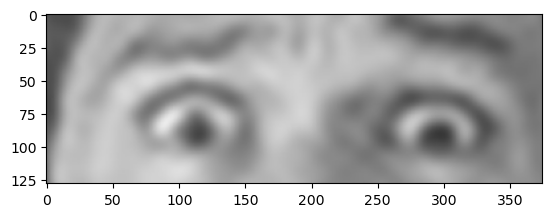

In [7]:
# Load the test image
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("D:\\dataset\\dataset\\test\\F\\630.jpg")
plt.imshow(img)
img = cv2.resize(img, (64, 64))
img = np.array(img)
img = img.reshape(1, 64, 64, 3)

# Predict the class
class_probs = model.predict(img)
pred_class = np.argmax(class_probs)
print(pred_class)


In [8]:
print(class_probs)

[[1. 0.]]


In [9]:
# Print the predicted class
if pred_class == 0:
    print("focused")
else:
    print("not-focused")

focused


In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
from keras.models import load_model
import tensorflow as tf
import os


# Load the trained model
model = load_model("C:\\Users\\DELL\\Downloads\\f1.h5")

# Path to the folder containing the images to be processed
folder_path = "D:\\frames_faces_eyes\\detected_eyes\\recording28\\"
class_names = ['focused', 'not-focused']
# Loop over each image file in the folder
for dirpath, dirnames, filenames in os.walk(folder_path):
    for filename in filenames:
        if filename.endswith('.jpg'):
            # Load and preprocess the image
            img_path = os.path.join(dirpath, filename)
            img = image.load_img(img_path, target_size=(64,64))
            img = np.expand_dims(img, axis=0)

            # Make a prediction using the loaded model
            result = model.predict(img)
            y_pred = np.argmax(result[0])
            print(f"{filename}:{result} ,{filename}: {y_pred}")
predicted_class = np.argmax(result)

print(f'Predicted class: {predicted_class}')

# Print the predicted class
if predicted_class == 0:
    print("focused")
else:
    print("not-focused")

1/1 [==============================] - 0s 47ms/step
frame_1.jpg:[[0. 1.]] ,frame_1.jpg: 1
1/1 [==============================] - 0s 11ms/step
frame_10.jpg:[[0. 1.]] ,frame_10.jpg: 1
1/1 [==============================] - 0s 20ms/step
frame_101.jpg:[[0. 1.]] ,frame_101.jpg: 1
1/1 [==============================] - 0s 19ms/step
frame_102.jpg:[[0. 1.]] ,frame_102.jpg: 1
1/1 [==============================] - 0s 14ms/step
frame_103.jpg:[[0. 1.]] ,frame_103.jpg: 1
1/1 [==============================] - 0s 20ms/step
frame_104.jpg:[[0. 1.]] ,frame_104.jpg: 1
1/1 [==============================] - 0s 27ms/step
frame_105.jpg:[[0. 1.]] ,frame_105.jpg: 1
1/1 [==============================] - 0s 30ms/step
frame_11.jpg:[[0. 1.]] ,frame_11.jpg: 1
1/1 [==============================] - 0s 19ms/step
frame_110.jpg:[[0. 1.]] ,frame_110.jpg: 1
1/1 [==============================] - 0s 33ms/step
frame_111.jpg:[[0. 1.]] ,frame_111.jpg: 1
1/1 [==============================] - 0s 36ms/step
frame_112.jpg:[[

1/1 [==============================] - 0s 16ms/step
frame_331.jpg:[[0. 1.]] ,frame_331.jpg: 1
1/1 [==============================] - 0s 16ms/step
frame_336.jpg:[[0. 1.]] ,frame_336.jpg: 1
1/1 [==============================] - 0s 20ms/step
frame_337.jpg:[[0. 1.]] ,frame_337.jpg: 1
1/1 [==============================] - 0s 30ms/step
frame_339.jpg:[[2.3698732e-27 1.0000000e+00]] ,frame_339.jpg: 1
1/1 [==============================] - 0s 17ms/step
frame_340.jpg:[[1. 0.]] ,frame_340.jpg: 0
1/1 [==============================] - 0s 19ms/step
frame_343.jpg:[[0. 1.]] ,frame_343.jpg: 1
1/1 [==============================] - 0s 21ms/step
frame_353.jpg:[[0. 1.]] ,frame_353.jpg: 1
1/1 [==============================] - 0s 19ms/step
frame_357.jpg:[[0. 1.]] ,frame_357.jpg: 1
1/1 [==============================] - 0s 16ms/step
frame_358.jpg:[[0. 1.]] ,frame_358.jpg: 1
1/1 [==============================] - 0s 7ms/step
frame_367.jpg:[[0. 1.]] ,frame_367.jpg: 1
1/1 [==============================] - 

1/1 [==============================] - 0s 20ms/step
frame_650.jpg:[[1. 0.]] ,frame_650.jpg: 0
1/1 [==============================] - 0s 21ms/step
frame_666.jpg:[[1. 0.]] ,frame_666.jpg: 0
1/1 [==============================] - 0s 20ms/step
frame_67.jpg:[[0. 1.]] ,frame_67.jpg: 1
1/1 [==============================] - 0s 22ms/step
frame_687.jpg:[[0. 1.]] ,frame_687.jpg: 1
1/1 [==============================] - 0s 22ms/step
frame_69.jpg:[[0. 1.]] ,frame_69.jpg: 1
1/1 [==============================] - 0s 22ms/step
frame_695.jpg:[[0. 1.]] ,frame_695.jpg: 1
1/1 [==============================] - 0s 21ms/step
frame_696.jpg:[[0. 1.]] ,frame_696.jpg: 1
1/1 [==============================] - 0s 20ms/step
frame_710.jpg:[[0. 1.]] ,frame_710.jpg: 1
1/1 [==============================] - 0s 21ms/step
frame_720.jpg:[[1. 0.]] ,frame_720.jpg: 0
1/1 [==============================] - 0s 21ms/step
frame_721.jpg:[[0. 1.]] ,frame_721.jpg: 1
1/1 [==============================] - 0s 19ms/step
frame_726.jp

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from google.colab import drive
import os

model = load_model('/content/drive/MyDrive/model/planb.h5')
folder_path = '/tmp/focused_/recording7/'
anger_prob = []
disgust_prob = []
fear_prob = []
happy_prob = []
neutral_prob = []
sad_prob = []
surprise_prob = []
for i, filename in enumerate(os.listdir(folder_path)):
  if filename.endswith('.jpg'):
    img_path = os.path.join(folder_path, filename)
    img = image.load_img(img_path, target_size=(48,48))
    img = np.expand_dims(img, axis=0)
    # Make a prediction using the loaded model
    result = model.predict(img)
    y_pred = np.argmax(result[0])
   # print(f"{filename}: {result}, {filename}: {y_pred}")
    # Save probability value for each class based on the mode predicted class
    if y_pred == 0:
      anger_prob.append(result[0][0])
    elif y_pred == 1:
      disgust_prob.append(result[0][1])
    elif y_pred == 2:
      fear_prob.append(result[0][2])
    elif y_pred == 3:
      happy_prob.append(result[0][3])
    elif y_pred == 4:
      neutral_prob.append(result[0][4])
    elif y_pred == 5:
      sad_prob.append(result[0][5])
    elif y_pred == 6:
      surprise_prob.append(result[0][6])
mode_class = np.argmax([len(anger_prob), len(disgust_prob), len(fear_prob), len(happy_prob), len(neutral_prob), len(sad_prob), len(surprise_prob)])
print(mode_class)


In [34]:
if mode_class == 0:
    e_cls='angry'
elif mode_class == 1:
    e_cls= 'disgust'
elif mode_class == 2:
    e_cls= 'fear'
elif mode_class ==3:
    e_cls= 'neutral'
elif mode_class== 4:
    e_cls= 'happy'
elif mode_class == 5:
    e_cls = 'sad'
else:
    e_cls='surprise'
    
print(e_cls)



0
angry


In [ ]:
# Save probability values for each class based on the mode predicted class
if mode_class == 0:
  final_probs = anger_prob
elif mode_class == 1:
  final_probs = disgust_prob
elif mode_class == 2:
  final_probs = fear_prob
elif mode_class == 3:
  final_probs = happy_prob
elif mode_class == 4:
  final_probs = neutral_prob
elif mode_class == 5:
  final_probs = sad_prob
elif mode_class == 6:
  final_probs = surprise_prob

print(final_probs)
print(len(final_probs))

In [ ]:
max_value = max(final_probs)
print(max_value)  #

In [32]:
if emotion == 'neutral':
    ci = (dep * 0.9) * 100
elif emotion == 'happy':
    ci = (dep * 0.6) * 100
elif emotion == 'surprised':
    ci = (dep * 0.5) * 100
elif emotion == 'sad' or emotion == 'scared':
    ci = (dep * 0.3) * 100
elif emotion == 'angry':
    ci = (dep * 0.25) * 100
elif emotion == 'disgust':
    ci = (dep * 0.2) * 100
else:
    ci = 0

print(f"CI: {ci}")


KeyboardInterrupt: Interrupted by user